# Project 2: matrices, probability, data, and visualization

Thsi project is intended to give you practice with Python, numpy, and plotting. You are given ample times for this project, but after this, you are expected to work much faster on your projects.


## Explanation: vectors of random variables
In the following we generate two vectors of random variables with a thength of $N$. Then we vertically stack them (please note that we could have just generated an $2 \times  N$  matrix but we wanted to introduce the vstack and hssack commands in numpy that will be useful in future).

Run the following code block by clicking the small "run" triangle in the top-left corner. NOTE: Look at the numbers for each matrix. Run the code box again and you will see different numbers! That is because every time you run the code box you are asking Numpy to generate new realizations of that same pdf.

In [ ]:
import numpy as np               # this command imports the numpy (numerical Python) library, and gives it the nickname "np"
import matplotlib.pyplot as plt  # this command imports the matplotlib plotting library, and gives it the nickname "plt"
import random                    # this command imports the matplotlib random variable library (we don't give it a nickname)
mean = 0                         # this command sets the mean to 0
sigma = 1                        # this command sets the standard deviation to 1 (so the variance is sigma^2 = 1, also)
N = 100000                       # this command sets the number of samples (the length of each vector) to 100,000
a = np.random.normal(mean, sigma, (1,N))  # this command uses the random library to create an 1xN vector of numbers generated by pdf N(0,1)
b = np.random.normal(mean, sigma, (1,N))  # though this command is the same as the one above, you can check that the numbers (the realizations) are distinct
X = np.vstack((a,b))                      # this command stacks the two vectors (concatenates them) vertically  (so we get a 2xN matrix)
XX = np.hstack((a,b))                     # this command stacks the two vectors (concatenates them) horizontally (so we get a 1x2N matrix)
print("The first five elements of a are:",a[:,1:6])  # this command displays all the rows of the first 5 elements of matrix a
print("The first five elements of b are:",b[:,1:6])  # this command displays all the rows of the first 5 elements of matrix b (distinct realizations of the Gaussian pdf)
print("The first five columns of X are: \n",X[:,1:6])
print("The first five columns of XX are: \n",XX[:,1:6])

The first five elements of a are: [[ 0.02198668 -1.71930656  0.9056513  -0.77528382  0.04352663]]
The first five elements of b are: [[-0.05280177 -2.62800299 -1.74529623  0.79572123 -0.65081904]]
The first five columns of X are: 
 [[ 0.02198668 -1.71930656  0.9056513  -0.77528382  0.04352663]
 [-0.05280177 -2.62800299 -1.74529623  0.79572123 -0.65081904]]
The first five columns of XX are: 
 [[ 0.02198668 -1.71930656  0.9056513  -0.77528382  0.04352663]]


The matrix $X$ is a $2 \times N$ matrix with 100,000 pairs of elements, side by side, in two long rows. We can view this matrix as a long row of pairs of independent random variables. So, each column is a $2 \times 1$ random vector with a Gaussian pdf.
***

## Explanation: Matrix multiplication and multiplication identity
We define the following matrix multiplication
$$
Y = A X
$$
Where
$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
    \end{bmatrix}
$$
Each element of $Y$ is the dot product (or inner product) of a row of $A$ with a column of $X$. For example,
$$
a_{12} = <row ~1 ~of ~A ~, ~column ~2 ~of ~X>
$$
In the special case where $A$ is an identity matrix, then the matrix multiplication does not change $X$. For example:
$$ \begin{align*}
AX &= \left[ \begin{array}{cc}
1 & 0\\
0 & 1
 \end{array} \right] \cdot
 \left[ \begin{array}{cc}
x_{11} & x_{12}\\
x_{21} & x_{22}
 \end{array} \right] \\
  &=
  \left[ \begin{array}{cc}
1\cdot x_{11}+0 \cdot x_{21} & 1\cdot x_{12} + 0\cdot x_{22}\\
0\cdot x_{11}+1\cdot x_{21} & 0 \cdot x_{12}+1\cdot x_{22}
 \end{array} \right] \\
 &=
 \left[ \begin{array}{cc}
x_{11} & x_{12}\\
x_{21} & x_{22}
 \end{array} \right] \\
 &= X
 \end{align*}
 $$


In the following we create an identity matrix, $A$. We test that left-multipying $X$ by $A$ does not alter the matrix $X$. NOTE: you may have to scroll along the output box to see all the graphs.


All elements of A are: 
 [[1 0]
 [0 1]]
The first five columns of X are: 
 [[ 0.02198668 -1.71930656  0.9056513  -0.77528382  0.04352663]
 [-0.05280177 -2.62800299 -1.74529623  0.79572123 -0.65081904]]
The first five columns of Y are: 
 [[ 0.02198668 -1.71930656  0.9056513  -0.77528382  0.04352663]
 [-0.05280177 -2.62800299 -1.74529623  0.79572123 -0.65081904]]

 The minimum of Y's 1st row is -4.453176943124798  the maximum of Y's 1st row is 4.2051194658087105 
 The minimum of Y's 2nd row is -4.5231720430427425  the maximum of Y's 2nd row is 4.517443282518687 



Text(0.5, 1.0, " 2D Histogram of Y's columns (Note: Mexican hat shape)")

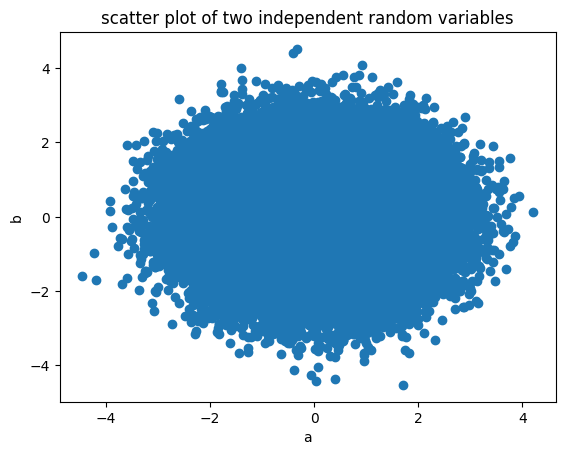

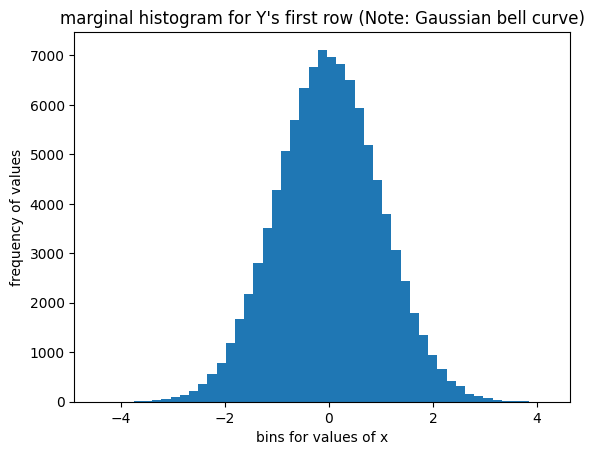

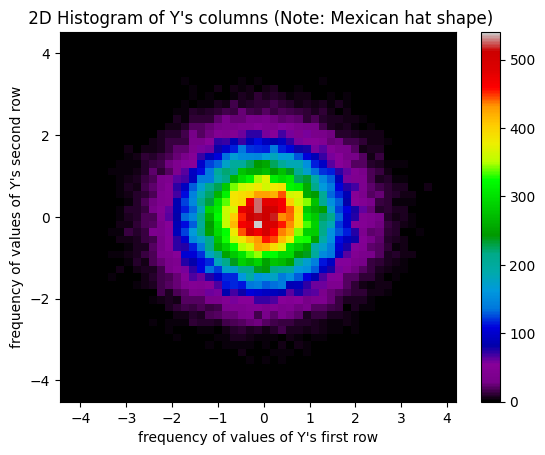

In [ ]:
A = np.array([[1,0],[0,1]])                     # this command uses the numpy library to create a 2x2 identity matrix
print("All elements of A are: \n",A[:,:])
Y = A @ X                                       # this command left-multiplies X by A
print("The first five columns of X are: \n",X[:,1:6])
print("The first five columns of Y are: \n",Y[:,1:6])  # printing the first few columns of X & Y verifies that they are the same

plt.figure()                                           # this command uses the plotting library to open a box for plotting
plt.scatter(Y[0,:],Y[1,:])                             # this command uses the plotting library to create a scatter plot with horizontal axis to be the 1st row of Y, and the vertical axis to be the 2nd row of Y
plt.title('scatter plot of two independent random variables')  # this command uses the plotting library to insert a title for the plot
plt.xlabel('a')                                                # this command uses the plotting library to insert a label "a" for the horizontal axis
plt.ylabel('b')                                                # this command uses the plotting library to insert a label "b" for the vertical axis

x_min = np.min(Y[0,:])                         # this command uses the numpy library to extract the minimum value from a matrice's 1st row
x_max = np.max(Y[0,:])                         # this command uses the numpy library to extract the maximum value from a matrice's 1st row
y_min = np.min(Y[1,:])                         # this command uses the numpy library to extract the minimum value from a matrice's 2nd row
y_max = np.max(Y[1,:])

print("\n The minimum of Y's 1st row is",x_min," the maximum of Y's 1st row is", x_max,"\n The minimum of Y's 2nd row is",y_min," the maximum of Y's 2nd row is", y_max,"\n")

# In the next graph, we will create a histogram of the data in Y's first row (a graph that shows the frequency of occurence of numerical data using rectangles)
N_hist = 50                                    # N=50 will be the number of rectangles or "bins" of our histogram
x_bins = np.linspace(x_min, x_max, N_hist)     # this command uses the numpy library to create the 50, equally spaced points for our graph's horizontal axis

plt.figure()                                   # this command uses the plotting library to open a box for plotting
plt.hist(Y[0,:], bins= x_bins)                 # this command uses the plotting library to plot the histogram of Y's first row
plt.xlabel('bins for values of x')             # this command uses the plotting library to insert the horizontal label
plt.ylabel('frequency of values')              # this command uses the plotting library to insert the vertical label
plt.title("marginal histogram for Y's first row (Note: Gaussian bell curve)") # this command uses the plotting library to insert a title

# In the next graph, we will create a 2-D histogram of the data in Y's first row along the horizontal axis, and Y's second row along the vertical axis
y_bins = np.linspace(y_min, y_max, N_hist)    # this command uses the numpy library to create the 50, equally spaced points for our graph's vertical axis

plt.figure()                                  # this command uses the plotting library to open a box for plotting
plt.hist2d(Y[0,:],Y[1,:], bins = [x_bins,y_bins], cmap = plt.cm.nipy_spectral)  # this command uses the plotting library to plot the 2-D histogram of Y's data with a lovely colormap
plt.colorbar()                                # this command uses the plotting library to insert a colorbar, so the reader can interpret the colors
plt.xlabel("frequency of values of Y's first row")  # this command uses the plotting library to insert the horizontal label
plt.ylabel("frequency of values of Y's second row") # this command uses the plotting library to insert the vertical label
plt.title(" 2D Histogram of Y's columns (Note: Mexican hat shape)")       # this command uses the plotting library to insert a title



This last graph shows a 2-dimensional histogram. What does this mean? If we consider that every column of Y is a $2 \times 1$ random vector, then we could graph each of these 100,000 vectors on a plot: the first element along the horizontal axis and the second element along the vertical axis.

A histogram shows us how often the values of these vectors fall within a window of values. For example, if $Y$ has three values, like this:
$$
Y = \begin{bmatrix}
1 & 1 & 1\\
7 & 7 & 7
    \end{bmatrix}
$$
Then the histogram would show exactly one point (little colored block) on it located at coordinates $(1,7)$, and the color of that point would be whatever color corresponds to $3$ (as that vector appears three times).
***

## Explanation: review of expectation (mean), variance, and covariance

We asked numpy to generate thousands of realizations based on a Gaussian pdf with mean $0$ and standard deviation $1$.
If I were to withhold the mean and the standard deviation from you, you could still get a pretty good estimate of these numbers by using the data itself.

Remember that the mean or expectation of a random variable is:
$$
E_X (x ) = \mu_x = \int_{-\infty}^{+\infty} x \cdot f_X(x) dx
$$
We can use our collection of realizations to approximate $\mu_x$ with the *sample* mean which is defined as the arithmetic average thus:
$$
m_X = \frac{1}{N} \sum \limits_{i=1}^N x_i ~~(\approx \mu_X~if~N~is~big) ~~~~~~~~~~~~~~~~~~~~~~(1)
$$
The variance of our random variable, which is the square of the standard deviation, can be witten as
$$
\sigma_X^2 = var(X) = E_X [(X-\mu_X )^2] = \int_{-\infty}^{+\infty} (x-\mu_X )^2 \cdot f_X(x) dx
$$
We can use our collection of realizations to approximate $\sigma_X^2$ thus:
$$
Var_X = \frac{1}{N} \sum \limits_{i=1}^N (x_i-m_X)^2 ~~~(\approx \sigma_X^2~if~N~is~big) ~~~~~~(2)
$$
The covariance between $X$ and $Y$ s given by
$$
cov(X,Y) = E_{XY} [(X-\mu_X )(Y-\mu_y )] = \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty}(x-\mu_X )(y-\mu_Y )\cdot f_{XY}(x,y) dxdy
$$
We can use our collection of realizations to approximate $cov(X,Y)$ thus:
$$
Cov_{XY} = \frac{1}{N} \sum \limits_{i=1}^N (x_i-m_X)(y_i-m_Y) ~~~(\approx cov(X,Y)~if~N~is~big) ~~~~~~(3)
$$

##Explanation: estimating mean, variance, and covariance

We'll use the data we've collected in the estimation formulas above. The mechanism we'll use here is "slow, but sure;" in other words, there are faster ways of implementing these estimates, but for now we'd like something that intuitively looks like our formulas (1), (2), and (3) above.

In [ ]:
x = Y[0,:]                              # We collect the first row of matrix Y in vector x
y = Y[1,:]                              # We collect the second row of matrix Y in vector y

mean_x = 0                              # We'll accumulate the sum for equation (1) for x in mean_x, initializing it to zero
mean_y = 0                              # We'll accumulate the sum for equation (1) for y in mean_y, initializing it to zero
var_x = 0                               # We'll accumulate the sum for equation (2) for x in var_x, initializing it to zero
var_y = 0                               # We'll accumulate the sum for equation (2) for y in var_y, initializing it to zero
cov_xy = 0                              # We'll accumulate the sum for equation (3) for x and y in cov_xy, initializing it to zero

for i in np.arange(N):                  # Here we initiate a "for" loop, using numpy's "arange" command to create evenly spaced values between 0 and N
  mean_x = mean_x + x[i]                # Everything indented is within the for loop
  mean_y = mean_y + y[i]                # In each cycle of the loop this mean_y adds the next element in the y vector to the running sum it already holds

mean_x = mean_x /N                      # Now, after exiting the loop, we divide the sum of x's values by N, as equation (1) shows
mean_y = mean_y/N                       # This is equation (1) applied to the y vector

print('the mean of x is equal to', mean_x )  # Here, we print our estimates.
print('the mean of y is equal to', mean_y )  # Note that the "true" mean is zero, so we expect these estimates to be very near zero

for i in np.arange(N):                   # Here we initiate a "for" loop, using numpy's "arange" coomand to create evenly spaced values between 0 and N
  var_x = var_x + np.square(x[i]-mean_x) # Everything indented is within the for loop.
  var_y = var_y + np.square(y[i]-mean_y) # In each cycle of the loop this var_y adds the next element in the y vector squared, minus the mean, to the running sum it already holds
  cov_xy = cov_xy + (x[i]-mean_x)*(y[i]-mean_y)

var_x = var_x/N                          # Now, after exiting the loop, we divide the sum by N, as equation (2) shows
var_y = var_y/N                          # Here, we divide the sum by N, as equation (2) shows
cov_xy = cov_xy/N                        # Here, we divide the sum by N, as equation (3) shows

print('Variance of x is equal to', var_x ) # Here, we print our estimates.
print('Variance of y is equal to', var_y ) # Note that the "true" variance is one, so we expect these estimates to be very near one
print('Covariance of x & y is equal to', cov_xy ) # Note that the two random vectors should be independent, so we expect this covariance to be near zero


the mean of x is equal to -0.0027212036331175624
the mean of y is equal to -0.002800818328433619
Variance of x is equal to 0.9936471716308658
Variance of y is equal to 0.991635567119959
Covariance of x & y is equal to 0.001439507189520109


When two random variables are independent, their covariance is zero, so we expect the estimate of the covarience to be near zero.
***

## Explanation: We now manipulate the matrix $A$ to force dependency between the two vectors

We change the matrix $A$ to no longer be an identity matrix. This new matrix results in non-independent random variables. First, we'll plot the histograms, so we'll see the effect of the mutual dependency.

All elements of our new A are: 
 [[0.5  0.25]
 [0.25 1.  ]]

 The minimum of Y's 1st row is -2.624171414565734  the maximum of Y's 1st row is 2.283589451646394 
 The minimum of Y's 2nd row is -4.3983177169058765  the maximum of Y's 2nd row is 4.4348505573687875 



Text(0.5, 1.0, "2D Histogram of Y's columns (Note: oval shape)")

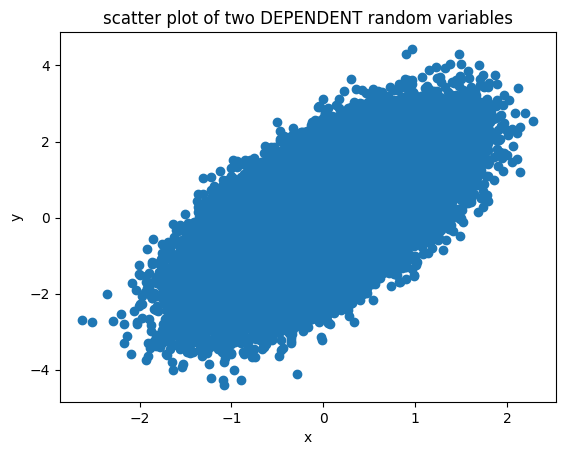

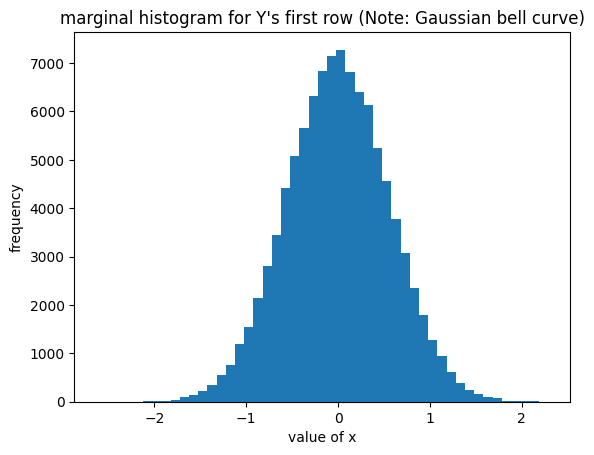

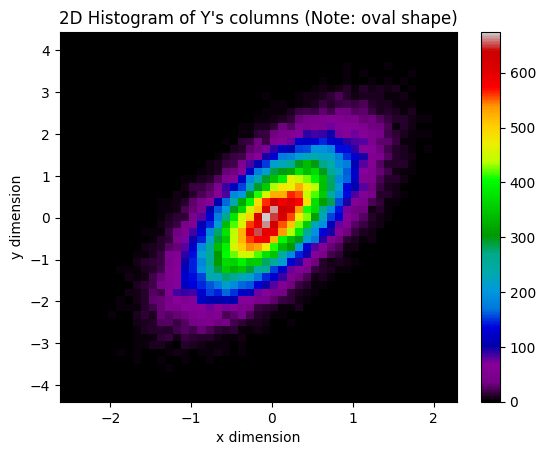

In [ ]:
A = np.array([[0.5,.25],[.25,1]])                              # this command uses the numpy library to create a 2x2 matrix that is not an identity matrix
print("All elements of our new A are: \n",A[:,:])

Y = A @ X                                                     # this command left-multiplies X by A

# You can see above for a reminder of what each of these plotting commands does
plt.figure()
plt.scatter(Y[0,:],Y[1,:])
plt.title('scatter plot of two DEPENDENT random variables')
plt.xlabel('x')
plt.ylabel('y')

x_min = np.min(Y[0,:])
x_max = np.max(Y[0,:])
y_min = np.min(Y[1,:])
y_max = np.max(Y[1,:])

print("\n The minimum of Y's 1st row is",x_min," the maximum of Y's 1st row is", x_max,"\n The minimum of Y's 2nd row is",y_min," the maximum of Y's 2nd row is", y_max,"\n")

N_hist = 50
x_bins = np.linspace(x_min, x_max, N_hist)
y_bins = np.linspace(y_min, y_max, N_hist)

# In the next graph, we will create a histogram of the data in Y's first row (a graph that shows the frequency of occurence of numerical data using rectangles)
plt.figure()
plt.hist(Y[0,:], bins= x_bins)
plt.xlabel('value of x')
plt.ylabel('frequency')
plt.title("marginal histogram for Y's first row (Note: Gaussian bell curve)")

# In the next graph, we will create a 2-D histogram of the data in Y's first row along the horizontal axis, and Y's second row along the vertical axis
plt.figure()
plt.hist2d(Y[0,:],Y[1,:], bins = [x_bins,y_bins], cmap = plt.cm.nipy_spectral)
plt.colorbar()
plt.xlabel('x dimension')
plt.ylabel('y dimension')
plt.title("2D Histogram of Y's columns (Note: oval shape)")



Notice that "large values of x tend to be associated with large values of y". They are no longer independent.
***

## Explanation: estimating the new mean, new variance, and new covariance

We'll use the data we've collected in the estimation formulas (1), (2), and (3). Since the values are no longer independent, we expect to see some changes.

In [ ]:
x = Y[0,:]
y = Y[1,:]
mean_x = 0
mean_y = 0
var_x = 0
var_y = 0
cov_xy = 0
for i in np.arange(N):
  mean_x = mean_x + x[i]
  mean_y = mean_y + y[i]     # every indented line is within the repeated loop

mean_x = mean_x /N    # equation (1)
mean_y = mean_y/N     # equation (1)

print('mean of new  x is equal to', mean_x )
print('mean of new y is equal to', mean_y )

for i in np.arange(N):
  var_x = var_x + np.square(x[i]-mean_x)           # every indented line is within the repeated loop
  var_y = var_y + np.square(y[i]-mean_y)
  cov_xy = cov_xy + (x[i]-mean_x)*(y[i]-mean_y)


var_x = var_x/N                                    # equation (2)
var_y = var_y/N                                    # equation (2)
cov_xy = cov_xy/N                                  # equation (3)

print('Variance of new x is equal to', var_x )
print('Variance of new y is equal to', var_y )
print('Covariance of new x & new y is equal to', cov_xy )

mean of new  x is equal to -0.00206080639866719
mean of new y is equal to -0.003481119236712962
Variance of new x is equal to 0.3107488926500929
Variance of new y is equal to 1.054458268941652
Covariance of new x & new y is equal to 0.3729245110279549


The means of the two random variables are still near zero, but notice that the variances both changed, and the covariance also changed.

What happened why did the variance and covariance change? Remember the following: if
$$
x_2 = \alpha x_1
$$

then we have that
$$
E_X[x_2] = \alpha E_X[x_1]
$$
and
$$
\sigma^2_{X_2} = \alpha^2 \sigma^2_{X_1}
$$
Also if

$$
x = \alpha_1 a + \beta_1 b \\
y = \alpha_2 a + \beta_2 b
$$

Then we have that

$$
E_{XY}[xy] = \alpha_1 \alpha_2 E_{\bf a}[a^2] + (\alpha_1 \beta_2 + \alpha_2 \beta_1) E_{\bf {ab}}[ab] + \beta_1 \beta_2 E_{\bf b}[b^2]
$$

### How does this relate to our problem?
As you can see above in the program, $a$ and $b$ are defined as Gaussian random variables with zero mean and variance equal to one. Also the transformation for $x$ and $y$ is defined as
$$
\begin{bmatrix}
x\\
y
\end{bmatrix}
=
 A
\begin{bmatrix}
a\\
b
\end{bmatrix}   
$$

where $A $ is defined in the program and you can use the value that is used in the program.
***

## Explanation: Python's built-in functions save time
Python has built in functions to estimate the mean, the variance, and the covariance from data samples. This way, we don't have to use loops. We use these functions in the next code block.

In [ ]:
mean_x = np.mean(x)                               # this command uses the numpy library to estimate the mean for the values in vector x
mean_y = np.mean(y)                               # this command uses the numpy library to estimate the mean for the values in vector y
var_x = np.var(x)                                 # this command uses the numpy library to estimate the variance for the values in vector x
var_y = np.var(y)                                 # this command uses the numpy library to estimate the variance for the values in vector y
cov_xy = np.cov(x,y)[0,1]                         # this command uses the numpy library to estimate the covariance for the values in vector x and vector y
                                                  # The command actually creates a 2x2 matrix, [var(x), cov(x,y); cov(y,x),var(y)], so we only need the top-reight one, [0,1]
print('the mean of x is equal to', mean_x, "and the mean of y is equal to",mean_y )
print('the variance of x is equal to', var_x  ,"and the variance of y is equal to",var_y)
print('Covariance of x & y is equal to', cov_xy )


the mean of x is equal to -0.0020608063986671697 and the mean of y is equal to -0.0034811192367129582
the variance of x is equal to 0.31074889265009215 and the variance of y is equal to 1.0544582689416395
Covariance of x & y is equal to 0.3729282403103533


Compare these values with the ones we obtained using "for loops".
***
***

# Your tasks for this project

In this section we want to use real data, rather than artificially generated data.

The first part of this section is a code that is copied from the book
*Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition
by Aurélien Géron*

## You are not required to know this, ... but it helps

The following code is included to obtain data for your project.
**You are not required to know this, but your employer would love it if you do!**
We are downloading some housing data for the state of California. This code is from Chapter 2 of the book cited above.
We'll download a single CSV file, uncompress it, and then view some parts of it.

In [ ]:
import os                                       # the os library provides functions for interacting with the operating system
import tarfile                                  # this library makes it possible to read and write tar archives
import urllib.request                           # this library provides functions and classes which help in opening URLs (mostly HTTP)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"   # this is the path where we find the data
HOUSING_PATH = os.path.join("datasets", "housing")                               # concatenates various path components
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"                     # creates the path

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):      # We define this function to fetch the data and uncompress it
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)                                    # extracts the compressed file
    housing_tgz.close()

fetch_housing_data()                                                             # this command invokes the function above

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd                           # Pandas library allows for data manipulation, specifically for structures
                                              # A structure allows you to save a tables of different types (integers, floats, strings, etc)
def load_housing_data(housing_path=HOUSING_PATH):                                # We define this structure to read the data from the CSV file and save it to a structure
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


housing = load_housing_data()                # This command invokes the function above to save the data to a structure called "housing"


Mounted at /content/drive


In a real project, you would have data scattered in a number of different sources, unlike here where we have a single source.
Also, in a real project the data would often be updated, so you would need this code to be run often to update your data.

Let's take a look at our new structure with housing data from California:

In [ ]:
housing.head()                # <structure name>.head command allows us to see the top five rows of our structure called "housing", along with its titles

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row holds data for one district. There are ten attributes (columns).
Nine of the attributes are numerical features, but the tenth one, "ocean_proximity", is a string feature. Typically, machines learning methods are mathematical, so we'd want to map these to some numbers. We can do that later.

The data also doesn't seem to make a lot of sense for the median_income. Sometimes you have to inquire what these features mean (in this case, the number means "tens of thousands of dollars", so this feature for the first row is $83,252) We d\won't make any changes for now.

This is useful, but we can't see how many districts the data has (how may rows).

In [ ]:
housing.info()              # <structure name>.info command gives a quich description of the data, like the number of rows we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


This told us that we have 20,640 rows of data, one for each district. This also gives us a heads up that some districts are missing features. For example, for the "longitude" attribute, all 20,640 rows have features, but for the total_bedrooms attribute only 20,433 rows have features. Some districts did not report data for this attribute. This is common, and it's up to you to figure out how your design with work when some features are missing for some instances.

Just by looking at the ocean_proximity attribute above, we get the idea that it represents some category. Let's get a bird's eye view of this tenth attribute:

In [ ]:
housing["ocean_proximity"].value_counts()        # <structure name>["axis label"].value_counts() returns all the feature values, and how many each on has

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing["housing_median_age"].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

## Extracting vectors for our homework

Your task is to extract features from different attributes, and obtain their mean, variance, and covariances.

In [ ]:
long = housing["longitude"]          # this will create a vector called "long" with all the longitude features from the structure "housing"
lat = housing["latitude"]            # this will create a vector called "lat" with all the latitude features from the structure "housing"
income = housing["median_income"]
prices=housing["median_house_value"]

# Your code must be added below this box.

(Problem 1) [2 points] Find the mean and the variance for these two features:
*   longitude
*   prices


(Problem 2) [3 points] Find the covariance of the following pairs of features:

*   income and prices
*   longitude and prices
*   income and longitude


In [ ]:
# Problem 1
long_mean = long.mean()
long_var = long.var()
prices_mean = prices.mean()
prices_var = prices.var()
print(f"mean of longitude: {long_mean}\nvariance of longitude: {long_var}\nmean of house prices: {prices_mean}\nvariance of house prices: {prices_var}")

mean of longitude: -119.56970445736432
variance of longitude: 4.014139367081251
mean of house prices: 206855.81690891474
variance of house prices: 13316148163.035278


In [ ]:
# Problem 2
cov_income_prices = np.cov(income, prices)[0,1]
cov_long_prices = np.cov(long, prices)[0,1]
cov_income_long = np.cov(income, long)[0,1]
print(f"covariance between income and prices: {cov_income_prices}\ncovariance between longitude and prices: {cov_long_prices}\ncovariance between income and longitude: {cov_income_long}")


covariance between income and prices: 150847.4827926605
covariance between longitude and prices: -10627.425205346402
covariance between income and longitude: -0.057764702074603214
